In [1]:
!pip install git+https://github.com/oracle/Skater.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/oracle/Skater.git to /tmp/pip-req-build-hd0a85v0
  Running command git clone --filter=blob:none --quiet https://github.com/oracle/Skater.git /tmp/pip-req-build-hd0a85v0
  Resolved https://github.com/oracle/Skater.git to commit 1ad4b4657a51ede7312fd9545e0db46316d481b3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for skater: filename=skater-1.1.2b1-py3-none-any.whl size=120024 sha256=1c25f86850548d6c11aad253f885ca8cd2fe350e753a810e0973f060248a5320
  Stored in directory: /tmp/pip-ephem-wheel-cache-qzru71zn/wheels/e9/ca/57/8f113272f3

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import time
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from tabulate import tabulate
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Perceptron
from timeit import timeit
from sklearn import datasets, tree
import datetime
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import pylab 
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
#from graphviz import Source
from IPython.display import Image
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy import interp
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn import metrics, tree
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import DBSCAN
#from mlxtend.classifier import StackingClassifier
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import scipy
from sklearn.model_selection import GridSearchCV
from google.cloud import bigquery
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import chi2_contingency

In [2]:
# set display options to show all columns
pd.set_option('display.max_columns', None)
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Set the client for future queries to BigQuery
client = bigquery.Client(project = "continente-lced-feup")
#data_table.enable_dataframe_formatter()
#auth.authenticate_user()

In [3]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=cOgtrAf0TMLBDzlG9kizvzBLN2CdIM&access_type=offline&code_challenge=p5pUWfnYAb_QtDAIrffNHei_pJIq6bcv2jjybLCSpIY&code_challenge_method=S256


Credentials saved to file: [/Users/henriqueribeiro/.config/gcloud/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "continente-lced-feup" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project

In [4]:
query = client.query("""
   SELECT *
   FROM 
       tables_staging.df_models
  LIMIT 2000000
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,GENDER,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT,TARGET
0,36467,10101,2,2021,1,1,0,1,5,12,0,1,15,33,0.00,0.00,35.50,28.55,0.00,1.00,4.20,6.33,1543,4775,9569,20584,1015,1967,2851,3996,0,0,1,3,0.00,0.00,0.00,106.00,M,5,2,4,101,0
1,36467,10101,4,2021,2,1,0,4,5,12,0,14,15,33,0.00,16.33,35.50,28.55,0.00,5.00,4.20,6.33,1479,4794,9569,20584,1083,2220,2851,3996,0,1,1,3,0.00,0.00,0.00,106.00,M,5,2,4,101,1
2,36467,10101,1,2022,1,1,4,7,10,22,12,18,20,32,9.00,14.33,14.11,16.86,4.00,4.43,4.20,4.50,1750,4763,9835,20550,1244,2244,3249,4550,0,0,0,4,0.00,0.00,0.00,43.67,M,5,2,4,101,0
3,36467,10101,2,2022,1,1,2,7,10,22,8,18,20,32,14.00,14.33,14.11,16.86,7.00,4.43,4.20,4.50,1410,4763,9835,20550,1041,2244,3249,4550,0,0,0,4,0.00,0.00,0.00,43.67,M,5,2,4,101,0
4,36467,10101,10,2022,4,2,2,7,12,22,13,18,21,32,18.00,14.00,15.00,16.86,9.50,5.71,4.75,4.50,1672,5294,10715,20550,1206,2552,3631,4550,2,3,4,4,18.00,39.50,43.67,43.67,M,5,2,4,101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,7649506,10101,12,2022,4,2,8,14,27,41,21,25,34,42,3.43,6.15,6.69,8.35,5.12,6.00,7.74,7.17,2029,5294,10715,20550,1453,2552,3631,4550,0,0,0,1,0.00,0.00,0.00,0.00,F,2,2,5,101,<NA>
1999996,7649506,10102,2,2021,1,1,5,10,17,32,27,34,37,44,5.25,6.22,9.62,10.35,12.00,10.10,8.24,6.44,1098,3425,6697,13663,780,1576,2277,3314,1,1,1,1,0.00,0.00,0.00,0.00,F,2,2,5,101,0
1999997,7649506,10102,4,2021,2,1,3,7,17,32,9,15,37,44,9.00,14.67,9.62,10.35,5.00,5.57,8.24,6.44,1083,3272,6697,13663,804,1632,2277,3314,0,0,1,1,0.00,0.00,0.00,0.00,F,2,2,5,101,0
1999998,7649506,10102,11,2021,4,2,1,8,15,32,3,16,18,44,0.00,10.00,10.14,10.35,3.00,4.62,4.40,6.44,1055,3556,6966,13663,803,1823,2612,3314,0,0,0,1,0.00,0.00,0.00,0.00,F,2,2,5,101,0


# Data Preparation

In [7]:
df = df.dropna()
df = df.drop_duplicates()

df['fulldate'] = pd.to_datetime(df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str))
# change from dtype datetime64[ns] to date time month
df['fulldate'] = df['fulldate'].dt.to_period('M')

df_200k = df.groupby('fulldate').sample(frac=0.2, random_state=101)

#drop customer id column because we want to generalize the model, instead of trying to predict for each customer
df_200k = df_200k.drop(columns=['CUSTOMER_ACCOUNT_NR_MASK'])

In [8]:
df_200k.value_counts('fulldate').sort_index()

fulldate
2021-01    16131
2021-02    16131
2021-03    16131
2021-04    16131
2021-05    16131
2021-06    16131
2021-07    16131
2021-08    16131
2021-09    16131
2021-10    16131
2021-11    16131
2021-12    16131
2022-01    16131
2022-02    16131
2022-03    16131
2022-04    16131
2022-05    16131
2022-06    16131
2022-07    16131
2022-08    16131
2022-09    16131
2022-10    16131
2022-11    16131
Freq: M, dtype: int64

In [9]:
numerical_columns = ['CUST_NUM_TRANSACTIONS_MONTH', 'CUST_NUM_TRANSACTIONS_QUARTER',
       'CUST_NUM_TRANSACTIONS_SEMESTER', 'CUST_NUM_TRANSACTIONS_YEAR',
       'CUST_NUM_UNIQUE_SUBCAT_MONTH', 'CUST_NUM_UNIQUE_SUBCAT_QUARTER',
       'CUST_NUM_UNIQUE_SUBCAT_SEMESTER', 'CUST_NUM_UNIQUE_SUBCAT_YEAR',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR',
       'CUST_AVG_BASKET_SIZE_MONTH', 'CUST_AVG_BASKET_SIZE_QUARTER',
       'CUST_AVG_BASKET_SIZE_SEMESTER', 'CUST_AVG_BASKET_SIZE_YEAR',
       'SUBCAT_NUM_TRANSACTIONS_MONTH', 'SUBCAT_NUM_TRANSACTIONS_QUARTER',
       'SUBCAT_NUM_TRANSACTIONS_SEMESTER', 'SUBCAT_NUM_TRANSACTIONS_YEAR',
       'SUBCAT_NUM_UNIQUE_CUST_MONTH', 'SUBCAT_NUM_UNIQUE_CUST_QUARTER',
       'SUBCAT_NUM_UNIQUE_CUST_SEMESTER', 'SUBCAT_NUM_UNIQUE_CUST_YEAR',
       'CUSTSUBCAT_NUM_TRANSACTIONS_MONTH',
       'CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER',
       'CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER',
       'CUSTSUBCAT_NUM_TRANSACTIONS_YEAR',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR',
       'FAMILY_MEMBERS']

scaler = MinMaxScaler()
df_200k[numerical_columns] = scaler.fit_transform(df_200k[numerical_columns])

Feature selection: Filter methods

In [7]:
def our_heatmap(df_values, threshold=1.1):

    # Define the colors
    colors = ['#84161a', '#fcf2f2']

    # Create a list of relative positions for each color
    positions = [0, 1]

    # Create the custom colormap
    cmap = mcolors.LinearSegmentedColormap.from_list("", list(zip(positions, colors)))

    # keep only the correlations above the threshold
    df_values = df_values[df_values < threshold]

    # Plot the heatmap with the custom colormap
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.heatmap(df_values, annot=True, cmap=cmap, vmin=0, vmax=1)

In [8]:
# calculate correlation matrix
corr = df_200k[numerical_columns].corr()

<AxesSubplot: >

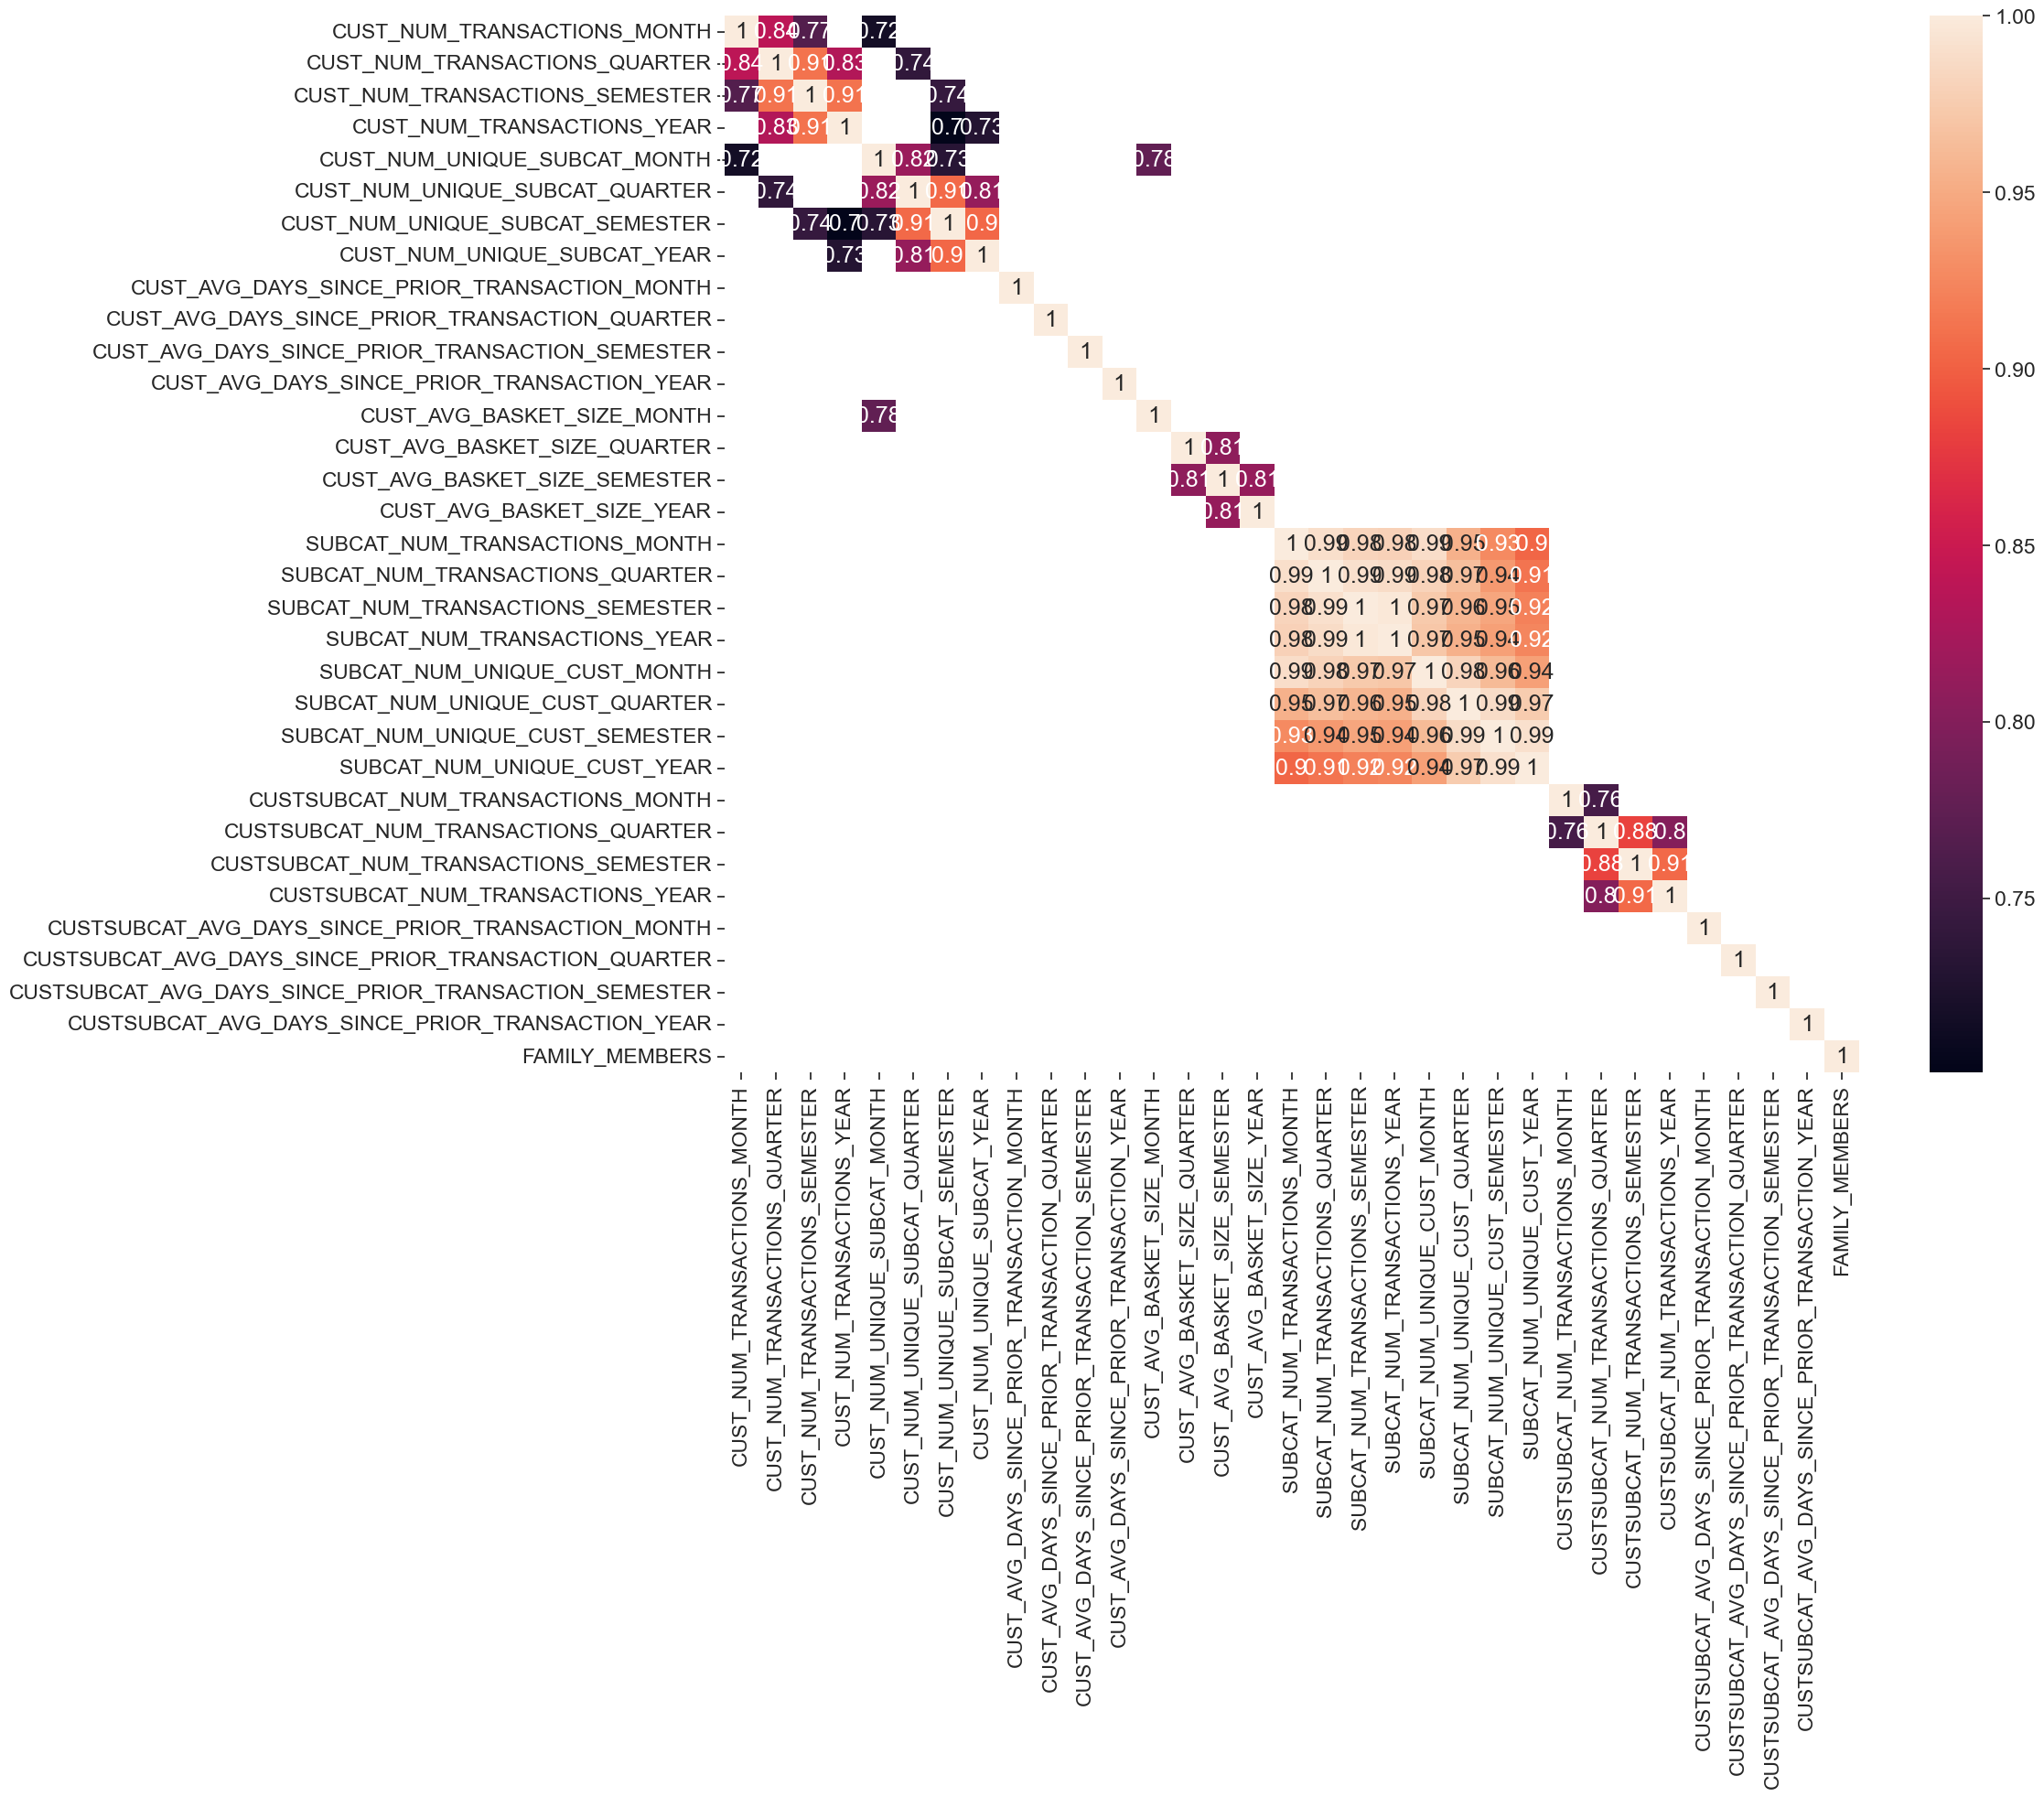

In [9]:
# set the threshold
threshold = 0.7

# keep only the correlations above the threshold
corr = corr[corr > threshold]

# Create the figure and the axes objects
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr,annot = True)

In [10]:
# Bootstrap sampling to identify associations/correlations between categorical variables

categorical_columns = ['SUBCAT_CD_EXT','MONTH','QUARTER','SEMESTER','YEAR','GENDER','SEG_LIFESTYLE_CD','SEG_LIFESTAGE_CD','CAT_CD_EXT']

df_200k = df_200k[categorical_columns]

# Create an empty matrix to store the p-values
pvals = np.zeros((len(df_200k.columns), len(df_200k.columns)))

n_bootstraps = 1000

pvals_ind = [None]*1000

# Loop through all pairs of variables and calculate the p-value
for i, var1 in enumerate(df_200k.columns):
    for j, var2 in enumerate(df_200k.columns):
        if i == j:
            continue
        else:
            for k in range(0, n_bootstraps):
                sample = df_200k.sample(200, replace=True)
                cont_table = pd.crosstab(sample[var1], sample[var2])
                chi2, pval, dof, expected = chi2_contingency(cont_table)
                pvals_ind[k] = pval
        
            pvals[i, j] = np.mean(pvals_ind)

# Convert the matrix to a data frame and print the results
pvals_df = pd.DataFrame(pvals, columns=df_200k.columns, index=df_200k.columns)

pvals_df

,SUBCAT_CD_EXT,MONTH,QUARTER,SEMESTER,YEAR,GENDER,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT
SUBCAT_CD_EXT,0.00,0.46,0.47,0.47,0.48,0.49,0.54,0.54,0.00
MONTH,0.46,0.00,0.00,0.00,0.15,0.50,0.50,0.50,0.47
QUARTER,0.47,0.00,0.00,0.00,0.35,0.48,0.48,0.48,0.48
SEMESTER,0.47,0.00,0.00,0.00,0.51,0.58,0.49,0.49,0.48
YEAR,0.48,0.14,0.38,0.52,0.00,0.61,0.48,0.48,0.49
GENDER,0.47,0.48,0.51,0.55,0.59,0.00,0.48,0.14,0.50
SEG_LIFESTYLE_CD,0.53,0.51,0.50,0.48,0.48,0.48,0.00,0.01,0.53
SEG_LIFESTAGE_CD,0.49,0.49,0.49,0.49,0.50,0.14,0.01,0.00,0.52
CAT_CD_EXT,0.00,0.49,0.48,0.49,0.49,0.48,0.52,0.50,0.00


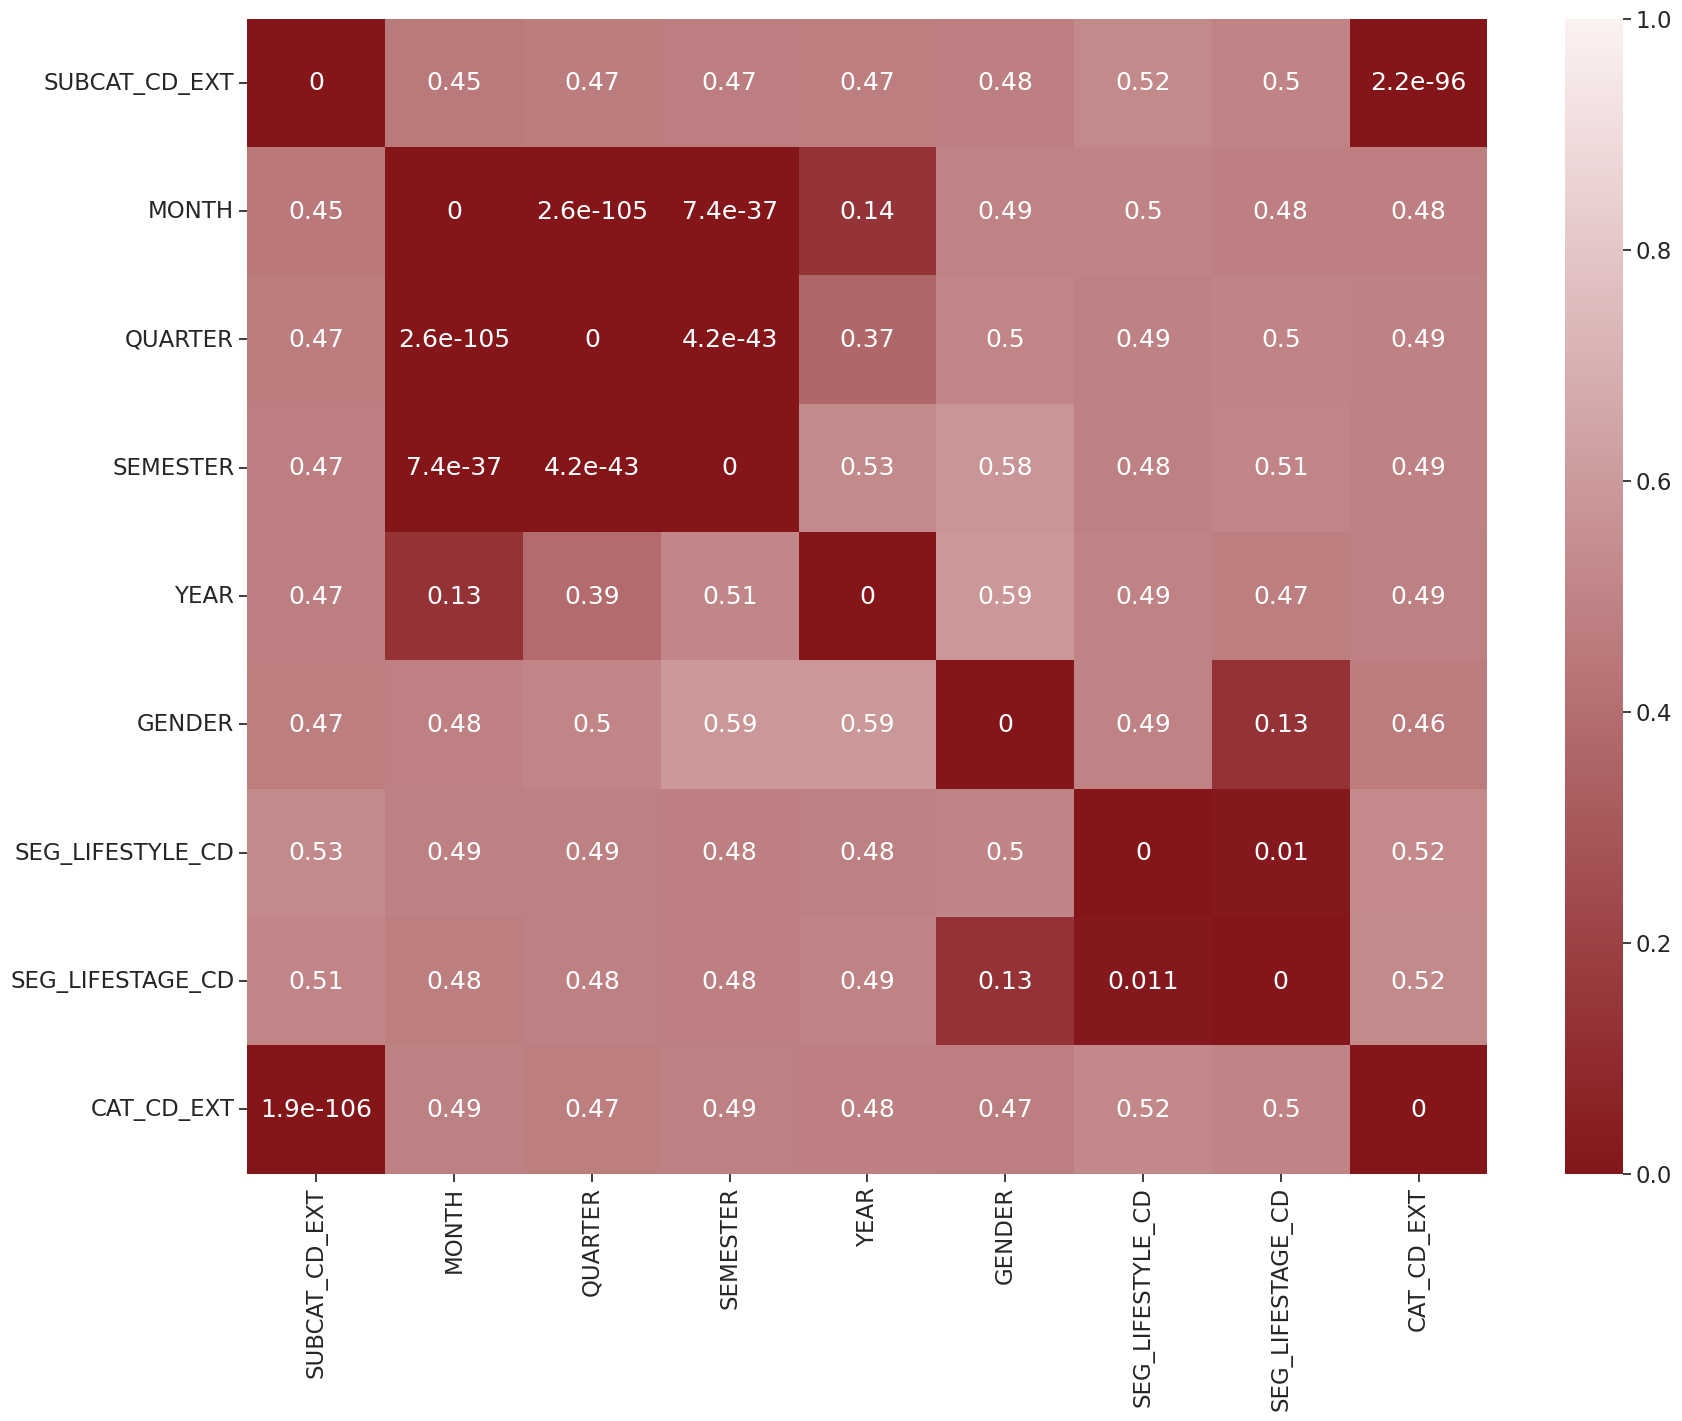

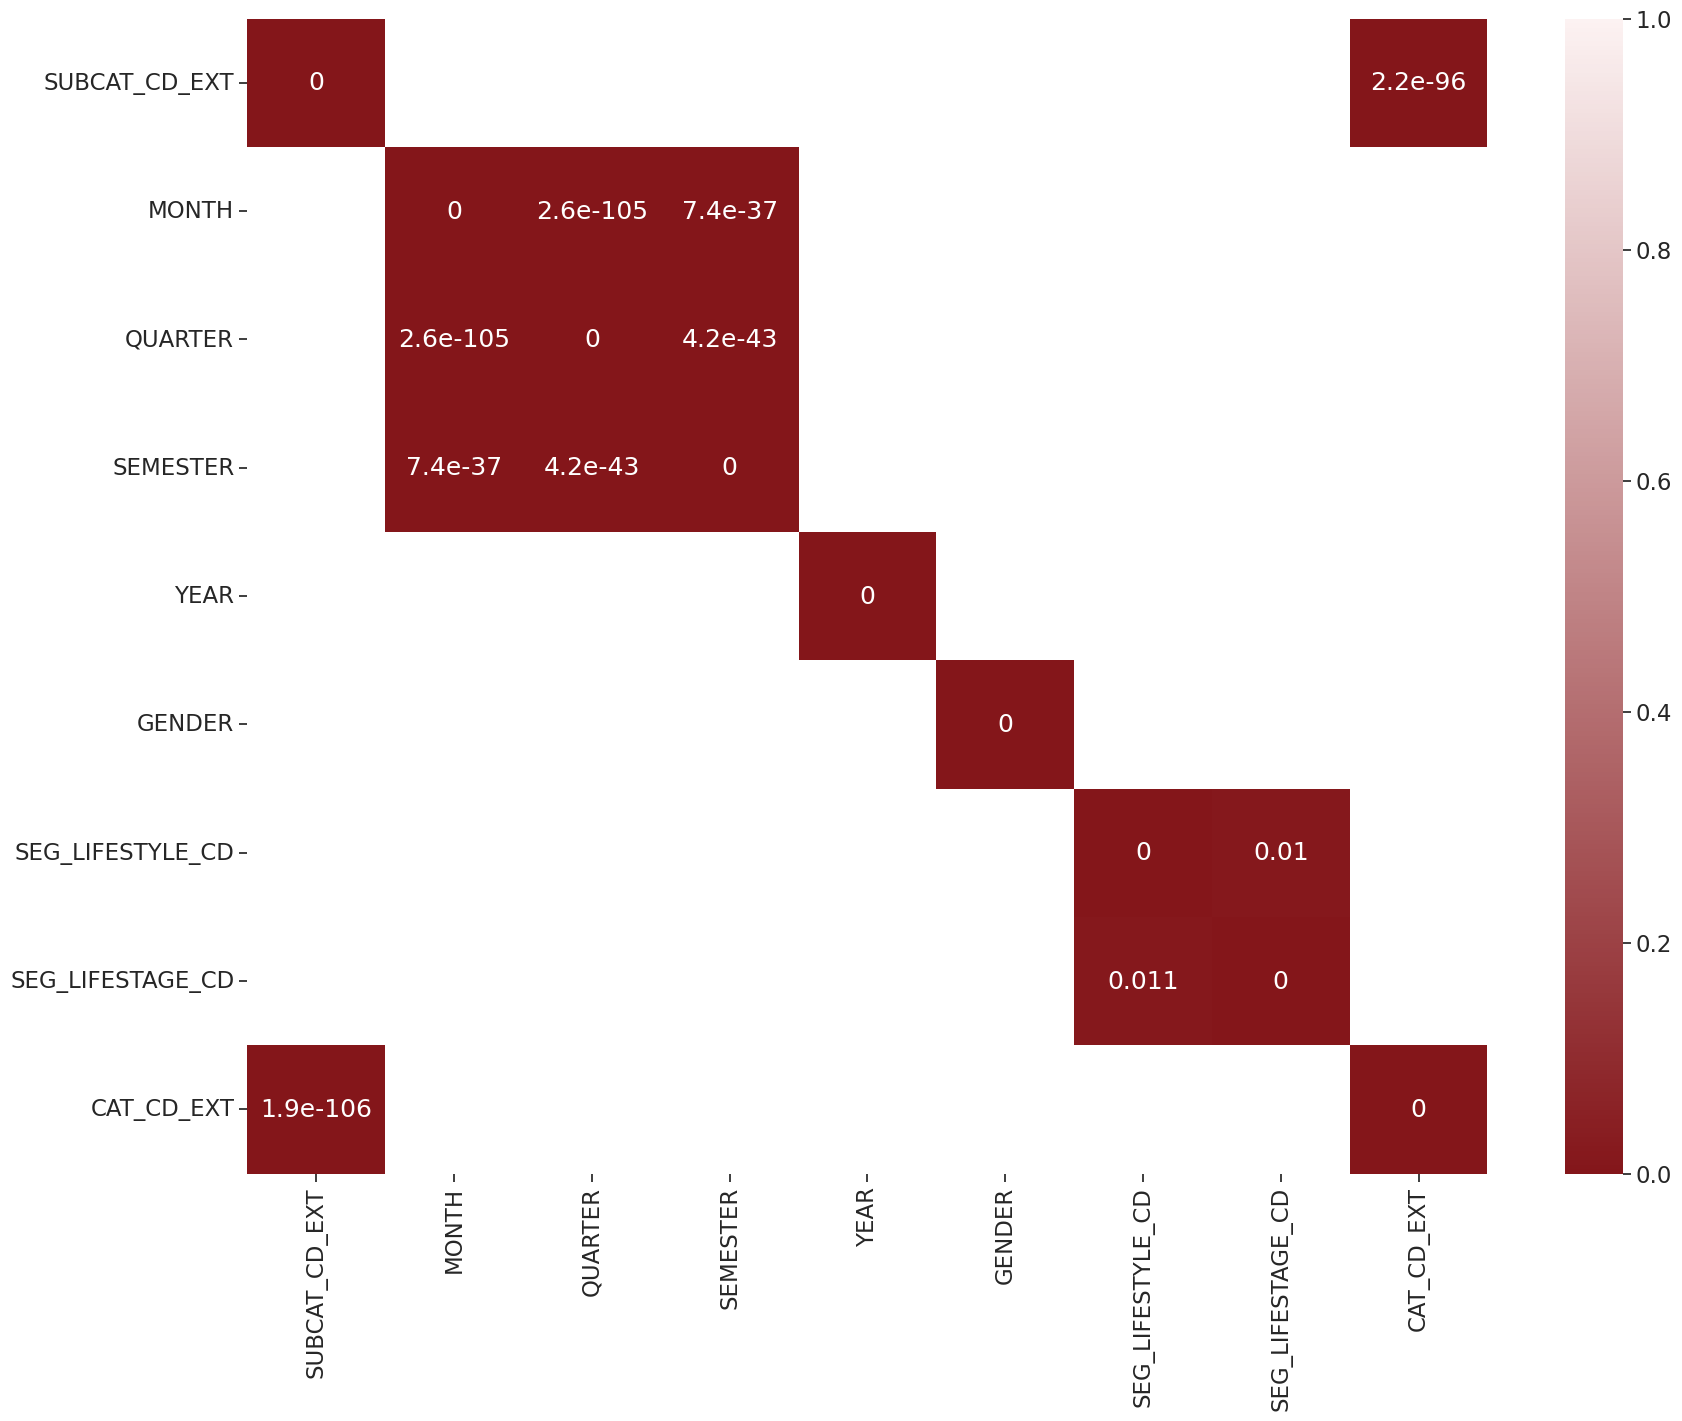

In [ ]:
our_heatmap(pvals_df)
our_heatmap(pvals_df, 0.05)

In [10]:
df_200k = df_200k.drop(columns=['QUARTER','SEMESTER','CAT_CD_EXT','SEG_LIFESTYLE_CD'])

In [11]:
# One-hot encoding categorical variables
df_200k = pd.get_dummies(df_200k, columns=['SUBCAT_CD_EXT', 'GENDER','SEG_LIFESTAGE_CD','MONTH', 'YEAR'])

In [12]:
df_200k

,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,FAMILY_MEMBERS,TARGET,fulldate,SUBCAT_CD_EXT_10101,SUBCAT_CD_EXT_10102,SUBCAT_CD_EXT_10201,SUBCAT_CD_EXT_10202,SUBCAT_CD_EXT_10203,SUBCAT_CD_EXT_10204,SUBCAT_CD_EXT_10205,SUBCAT_CD_EXT_10206,SUBCAT_CD_EXT_10207,SUBCAT_CD_EXT_10208,SUBCAT_CD_EXT_10301,SUBCAT_CD_EXT_10302,SUBCAT_CD_EXT_10303,SUBCAT_CD_EXT_10305,SUBCAT_CD_EXT_20201,SUBCAT_CD_EXT_20202,SUBCAT_CD_EXT_20203,SUBCAT_CD_EXT_20204,SUBCAT_CD_EXT_20205,SUBCAT_CD_EXT_20301,SUBCAT_CD_EXT_20302,SUBCAT_CD_EXT_20303,SUBCAT_CD_EXT_20304,SUBCAT_CD_EXT_20305,SUBCAT_CD_EXT_20306,SUBCAT_CD_EXT_20307,SUBCAT_CD_EXT_30201,SUBCAT_CD_EXT_30202,SUBCAT_CD_EXT_30203,SUBCAT_CD_EXT_30204,SUBCAT_CD_EXT_30205,SUBCAT_CD_EXT_30206,SUBCAT_CD_EXT_30207,SUBCAT_CD_EXT_30208,SUBCAT_CD_EXT_30301,SUBCAT_CD_EXT_30302,SUBCAT_CD_EXT_30303,SUBCAT_CD_EXT_30304,SUBCAT_CD_EXT_30305,SUBCAT_CD_EXT_30306,SUBCAT_CD_EXT_30401,SUBCAT_CD_EXT_30402,SUBCAT_CD_EXT_30403,SUBCAT_CD_EXT_50201,SUBCAT_CD_EXT_50202,SUBCAT_CD_EXT_50203,SUBCAT_CD_EXT_50301,SUBCAT_CD_EXT_50302,SUBCAT_CD_EXT_50303,SUBCAT_CD_EXT_50304,SUBCAT_CD_EXT_50305,SUBCAT_CD_EXT_50401,SUBCAT_CD_EXT_50402,SUBCAT_CD_EXT_50403,SUBCAT_CD_EXT_50404,SUBCAT_CD_EXT_60101,SUBCAT_CD_EXT_60102,SUBCAT_CD_EXT_60103,SUBCAT_CD_EXT_60105,SUBCAT_CD_EXT_60106,SUBCAT_CD_EXT_60107,SUBCAT_CD_EXT_60301,SUBCAT_CD_EXT_60302,SUBCAT_CD_EXT_60303,SUBCAT_CD_EXT_60304,SUBCAT_CD_EXT_60305,SUBCAT_CD_EXT_60306,SUBCAT_CD_EXT_60307,SUBCAT_CD_EXT_60401,SUBCAT_CD_EXT_60402,SUBCAT_CD_EXT_60403,SUBCAT_CD_EXT_60404,SUBCAT_CD_EXT_60405,SUBCAT_CD_EXT_60406,SUBCAT_CD_EXT_70201,SUBCAT_CD_EXT_70202,SUBCAT_CD_EXT_70203,SUBCAT_CD_EXT_70204,SUBCAT_CD_EXT_70205,SUBCAT_CD_EXT_70206,SUBCAT_CD_EXT_80101,SUBCAT_CD_EXT_80102,SUBCAT_CD_EXT_80103,SUBCAT_CD_EXT_80104,SUBCAT_CD_EXT_80105,SUBCAT_CD_EXT_80107,SUBCAT_CD_EXT_80110,SUBCAT_CD_EXT_80111,SUBCAT_CD_EXT_80401,SUBCAT_CD_EXT_80402,SUBCAT_CD_EXT_80403,SUBCAT_CD_EXT_80404,SUBCAT_CD_EXT_80405,SUBCAT_CD_EXT_80406,SUBCAT_CD_EXT_80407,SUBCAT_CD_EXT_80408,SUBCAT_CD_EXT_80409,SUBCAT_CD_EXT_80411,SUBCAT_CD_EXT_80413,SUBCAT_CD_EXT_80414,SUBCAT_CD_EXT_80415,SUBCAT_CD_EXT_90201,SUBCAT_CD_EXT_90202,SUBCAT_CD_EXT_90203,SUBCAT_CD_EXT_90204,SUBCAT_CD_EXT_90206,SUBCAT_CD_EXT_100101,SUBCAT_CD_EXT_100102,SUBCAT_CD_EXT_100201,SUBCAT_CD_EXT_100202,SUBCAT_CD_EXT_100203,SUBCAT_CD_EXT_100204,SUBCAT_CD_EXT_100205,SUBCAT_CD_EXT_140201,SUBCAT_CD_EXT_140202,SUBCAT_CD_EXT_140203,SUBCAT_CD_EXT_140204,SUBCAT_CD_EXT_140205,SUBCAT_CD_EXT_140206,SUBCAT_CD_EXT_140301,SUBCAT_CD_EXT_140302,SUBCAT_CD_EXT_140303,SUBCAT_CD_EXT_140304,SUBCAT_CD_EXT_170101,SUBCAT_CD_EXT_170105,SUBCAT_CD_EXT_170106,SUBCAT_CD_EXT_170108,SUBCAT_CD_EXT_170109,SUBCAT_CD_EXT_170110,SUBCAT_CD_EXT_170111,SUBCAT_CD_EXT_170112,SUBCAT_CD_EXT_170114,SUBCAT_CD_EXT_170301,SUBCAT_CD_EXT_170302,SUBCAT_CD_EXT_170303,SUBCAT_CD_EXT_170304,SUBCAT_CD_EXT_170305,SUBCAT_CD_EXT_170307,SUBCAT_CD_EXT_170309,SUBCAT_CD_EXT_170310,SUBCAT_CD_EXT_1703

Outlier detection (unsupervised learning)

In [14]:
def plot_3d_clusters(df_clst, z_rot):
    # Compute the first three principal components of the data
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(df_clst)

    # Create a scatter plot of the first three principal components, colored by cluster
    cluster_colors = np.array(['#de1c26', 'yellow', 'orange', 'red', 'purple', 'black', 'gray', 'magenta', '#84161a'])
    sns.set_style("ticks", {"axes.facecolor": "#ffffff"})
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(principal_components[:,0], principal_components[:,1], principal_components[:,2], c=cluster_colors[df_clst['cluster'].values % len(cluster_colors)], alpha=0.8)
    ax.scatter(principal_components[outliers_mask, 0], principal_components[outliers_mask, 1], principal_components[outliers_mask, 2], c='#84161a', marker='X', s=100, alpha=1.0)
    ax.view_init(elev=10, azim=z_rot)
    
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')

    ax.w_xaxis.set_pane_color('#fcf2f2')  # Change x-axis color
    ax.w_yaxis.set_pane_color('#fcf2f2')  # Change y-axis color
    ax.w_zaxis.set_pane_color('#fcf2f2')  # Change z-axis color

    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    #ax.grid(False)

    plt.show()


def plot_2d_clusters(df_clst):
    # Compute the first two principal components of the data
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_clst)

    # Create a scatter plot of the first three principal components, colored by cluster
    cluster_colors = np.array(['#de1c26', 'yellow', 'orange', 'red', 'purple', 'black', 'gray', 'magenta', '#84161a'])
    sns.set_style("ticks", {"axes.facecolor": "#ffffff"})
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.scatter(principal_components[:,0], principal_components[:,1], c=cluster_colors[df_clst['cluster'].values % len(cluster_colors)], alpha=0.8)
    ax.scatter(principal_components[outliers_mask, 0], principal_components[outliers_mask, 1], c='#84161a', marker='X', s=100, alpha=1.0)

    ax.set_facecolor('#fcf2f2')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.show()

In [15]:
# Extract the numerical columns
df_200k_out = df_200k[numerical_columns]

batch_size = 50000

while len(df_200k_out) > batch_size:
    df_50k = df_200k_out.sample(batch_size, replace=False)
    # Perform DBSCAN clustering and obtain cluster labels
    dbscan = DBSCAN(eps=0.6, min_samples=800)
    labels = dbscan.fit_predict(df_50k)

    # Identify the outliers
    outliers_mask = labels == -1
    outliers = df_50k[outliers_mask]
    df_200k_out = df_200k_out.drop(index=df_50k.index)
    df_200k = df_200k.drop(index=outliers.index)

    print("Number of outliers:", len(outliers))

    # Add cluster labels to the original dataframe
    df_50k['cluster'] = labels


# Perform DBSCAN clustering and obtain cluster labels
dbscan = DBSCAN(eps=0.6, min_samples=800)
labels = dbscan.fit_predict(df_200k_out)

# Identify the outliers
outliers_mask = labels == -1
outliers = df_200k_out[outliers_mask]
df_200k = df_200k.drop(index=outliers.index)

print("Number of outliers:", len(outliers))

# Add cluster labels to the original dataframe
df_200k_out['cluster'] = labels

plot_2d_clusters(df_200k_out)

plot_3d_clusters(df_200k_out, 0)
plot_3d_clusters(df_200k_out, 90)
plot_3d_clusters(df_200k_out, 180)
plot_3d_clusters(df_200k_out, 270)

KeyError: "None of [Index(['CUST_NUM_TRANSACTIONS_MONTH', 'CUST_NUM_TRANSACTIONS_QUARTER',\n       'CUST_NUM_TRANSACTIONS_SEMESTER', 'CUST_NUM_TRANSACTIONS_YEAR',\n       'CUST_NUM_UNIQUE_SUBCAT_MONTH', 'CUST_NUM_UNIQUE_SUBCAT_QUARTER',\n       'CUST_NUM_UNIQUE_SUBCAT_SEMESTER', 'CUST_NUM_UNIQUE_SUBCAT_YEAR',\n       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH',\n       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER',\n       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER',\n       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR',\n       'CUST_AVG_BASKET_SIZE_MONTH', 'CUST_AVG_BASKET_SIZE_QUARTER',\n       'CUST_AVG_BASKET_SIZE_SEMESTER', 'CUST_AVG_BASKET_SIZE_YEAR',\n       'SUBCAT_NUM_TRANSACTIONS_MONTH', 'SUBCAT_NUM_TRANSACTIONS_QUARTER',\n       'SUBCAT_NUM_TRANSACTIONS_SEMESTER', 'SUBCAT_NUM_TRANSACTIONS_YEAR',\n       'SUBCAT_NUM_UNIQUE_CUST_MONTH', 'SUBCAT_NUM_UNIQUE_CUST_QUARTER',\n       'SUBCAT_NUM_UNIQUE_CUST_SEMESTER', 'SUBCAT_NUM_UNIQUE_CUST_YEAR',\n       'CUSTSUBCAT_NUM_TRANSACTIONS_MONTH',\n       'CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER',\n       'CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER',\n       'CUSTSUBCAT_NUM_TRANSACTIONS_YEAR',\n       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH',\n       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER',\n       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER',\n       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR', 'FAMILY_MEMBERS'],\n      dtype='object')] are in the [columns]"

# Machine Learning

In [25]:
def get_results(model, gs ,name, data, true_labels, target_names = ['No buy', 'Buy'], results=None, reasume=False):
    
    if hasattr(model, 'layers'):
        param = wtp_dnn_model.history.params
        best = np.mean(history.history['val_accuracy'])
        predicted_labels = np.argmax(model.predict(data) , axis=-1)
        im_model = InMemoryModel(model.predict, examples=data, target_names=target_names)

    else:
        param = gs.best_params_
        best = gs.best_score_
        predicted_labels = model.predict(data).ravel()
        if hasattr(model, 'predict_proba'):
            #predicted_probs = model.predict_proba(data)[:, 1]
            #print(f'This is the predict_proba results but the ones from the get_results function: {predicted_probs}')
            print('This model has a predict_proba method')
        elif hasattr(model, 'decision_function'):
            im_model = InMemoryModel(model.decision_function, examples=data, target_names=target_names)
        else: 
            print('Cannot use InMemoryModel as predict_proba is not available')
           
        
    print('Mean Best Accuracy: {:2.2%}'.format(best))
    print('-'*60)
    print('Best Parameters:')
    print(param)
    print('-'*60)
    
    y_pred = model.predict(data).ravel()
    
    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels, target_names = target_names)
    if len(target_names)==2:
        ras = roc_auc_score(y_true=true_labels, y_score=y_pred)
    else:
        roc_auc_multiclass, ras = roc_auc_score_multiclass(y_true=true_labels, y_score=y_pred, target_names=target_names)
        print('\nROC AUC Score by Classes:\n',roc_auc_multiclass)
        print('-'*60)

    print('\n\n              ROC AUC Score: {:2.2%}'.format(ras))
    prob, score_roc, roc_auc = plot_model_roc_curve(model, data, true_labels, label_encoder=None, class_names=target_names)
    
    #interpreter = Interpretation(data, feature_names=cols)
    #plots = interpreter.feature_importance.plot_feature_importance(im_model, progressbar=False, n_jobs=1, ascending=True)
    
    r1 = pd.DataFrame([(prob, best, np.round(accuracy_score(true_labels, predicted_labels), 4), 
                         ras, roc_auc)], index = [name],
                         columns = ['Prob', 'CV Accuracy', 'Accuracy', 'ROC AUC Score', 'ROC Area'])
    if reasume:
        results = r1
    elif (name in results.index):        
        results.loc[[name], :] = r1
    else: 
        results = results.append(r1)
        
    return results, 


def roc_auc_score_multiclass(y_true, y_score, target_names, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_true)
  roc_auc_dict = {}
  mean_roc_auc = 0
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_y_true = [0 if x in other_class else 1 for x in y_true]
    new_y_score = [0 if x in other_class else 1 for x in y_score]
    num_new_y_true = sum(new_y_true)

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_y_true, new_y_score, average = average)
    roc_auc_dict[target_names[per_class]] = np.round(roc_auc, 4)
    mean_roc_auc += num_new_y_true * np.round(roc_auc, 4)
    
  mean_roc_auc = mean_roc_auc/len(y_true)  
  return roc_auc_dict, mean_roc_auc

def get_metrics(true_labels, predicted_labels):
    global accuracy
    global precision
    global recall
    global f1
    accuracy = metrics.accuracy_score(true_labels, predicted_labels)
    precision = metrics.precision_score(true_labels, predicted_labels)
    recall = metrics.recall_score(true_labels, predicted_labels)
    f1 = metrics.f1_score(true_labels, predicted_labels)
    
    print('Accuracy:  {:2.2%} '.format(accuracy))
    print('Precision: {:2.2%} '.format(precision))
    print('Recall:    {:2.2%} '.format(recall))
    print('F1 Score:  {:2.2%} '.format(f1))
    # #append results to arrays
    # np.append(accuracy_array, metrics.accuracy_score(true_labels, predicted_labels))
    # np.append(precision_array, metrics.precision_score(true_labels, predicted_labels, average='weighted'))
    # np.append(recall_array, metrics.recall_score(true_labels, predicted_labels, average='weighted'))
    # np.append(f1_array, metrics.f1_score(true_labels, predicted_labels, average='weighted'))
    
                        

def train_predict_model(classifier,  train_features, train_labels,  test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, target_names):
    
    total_classes = len(target_names)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], target_names], codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], target_names], codes=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, target_names):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=target_names) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels, target_names):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)

def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
   
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prb = clf.predict_proba(features)
            if prb.shape[1] > 1:
                y_score = prb[:, prb.shape[1]-1] 
            else:
                y_score = clf.predict(features).ravel()
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            print("\n")
            #raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(true_labels, y_score)      
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {0:3.2%})'.format(roc_auc), linewidth=2.5)
        
    elif n_classes > 2:
        if  hasattr(clf, 'clfs_'):
            y_labels = label_binarize(true_labels, classes=list(range(len(class_labels))))
        else:
            y_labels = label_binarize(true_labels, classes=class_labels)
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
            
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_labels[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_labels.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(12, 6))
        plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["macro"]), linewidth=3)
  
        for i, label in enumerate(class_names):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:2.2%})'
                                           ''.format(label, roc_auc[i]), linewidth=2, linestyle=':')
            
        roc_auc = roc_auc["macro"]   
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    
    return prob, y_score, roc_auc

In [26]:
class select_fetaures(object):  # BaseEstimator, TransformerMixin,
     def __init__(self, select_cols):
         self.select_cols_ = select_cols

     def fit(self, X, Y):
         pass

     def transform(self, X):
         return X.loc[:, self.select_cols_]

     def fit_transform(self, X, Y):
         self.fit(X, Y)
         df = self.transform(X)
         return df

     def __getitem__(self, x):
         return self.X[x], self.Y[x]

In [59]:
def LR(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):
        
    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', LogisticRegression())])  

    param_grid = {}

    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='f1', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))
        
    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=2, verbose=1, n_jobs=-1)
    LR = Pipeline([('gs', gs)]) 
        
    LR.fit(X_train,y_train)

    global y_proba
    y_proba = LR.predict_proba(X_test)
    

    results = get_results(LR, gs ,'Logistic Regression', X_test, y_test, reasume=True)
    print(results)
    print(f'This is the predict_proba results {y_proba}')
        

def RF(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):

    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', RandomForestClassifier())])  

    param_grid = {'clf__criterion': ['gini']  # , 'entropy', 'log_loss'
                  ,'clf__n_estimators':  [500]       
                  ,'clf__min_samples_split': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
                  ,'clf__max_depth': [10, 50, 100, 150, 200]
                  ,'clf__min_samples_leaf': [20, 40, 60, 80, 100]}
    
    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='recall', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))

    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='recall', cv=2, verbose=1, n_jobs=-1)
    RF = Pipeline([('gs', gs)]) 
        
    RF.fit(X_train,y_train)

    results = get_results(RF, gs ,'Random Forest', X_test, y_test, reasume=True)
    print(results)


def SVM(X_train, y_train, X_train_tuning, y_train_tuning, X_test, y_test):

    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', svm.SVC())])  

    param_grid = {'clf__C': [0.05, 0.1, 0.15, 0.2]  # 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
                  ,'clf__kernel' : ['rbf']}   #, 'linear', , 'poly', 'linear', 'sigmoid', 'precomputed'

    # Use SequentialFeatureSelector for backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.05, direction='forward', scoring='f1', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tuning, y_train_tuning)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))
        
    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
    SVM = Pipeline([('gs', gs)]) 
        
    SVM.fit(X_train,y_train)

    results = get_results(SVM, gs ,'Support Vector Machines', X_test, y_test, reasume=True)
    print(results)
    

def ANN(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):
    
    clf = Pipeline([
            # ('pca', PCA()),
            ('clf', MLPClassifier())])  

    param_grid = {'clf__hidden_layer_sizes': [(64,), (128,), (256,)],
                  'clf__activation': ['relu'],
                  'clf__solver': ['adam'],
                  'clf__early_stopping': [True],  # creates a stratified validation set (10% of training data)
                  'clf__validation_fraction': [0.2], 
                  'clf__n_iter_no_change': [10],
                  'clf__alpha': [0.0001, 0.001],
                  'clf__learning_rate': ['constant','invscaling','adaptive'],
                  'clf__tol': [0.0001, 0.001],
                  'clf__learning_rate_init': [0.0001, 0.001],
                  'clf__max_iter': [1000]}

    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='f1', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))

    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=2, verbose=1, n_jobs=-1)
    ANN = Pipeline([('gs', gs)]) 
        
    ANN.fit(X_train,y_train)

    results = get_results(ANN, gs ,'Neural Network', X_test, y_test, reasume=True)
    print(results)

In [109]:
def cv_12months(df_ML, model, resampling_tecnique):
    timestamps = df_ML['fulldate'].sort_values().unique()
    #display(timestamps.size)

    # find the minimum timestamp
    min_timestamp = timestamps[0]

    #store each of the metrics in an array for each one
    accuracy_array = np.array([])
    precision_array = np.array([])
    recall_array = np.array([])
    f1_array = np.array([])

    
    probability_array = np.array([])

    # full_xtest_df = []

    full_test_count = 0
    

    
    # iterate over the timestamps and check if the time difference is less than 12 months
    for ts in timestamps[:-3]:
        if ts + 13 > timestamps.max():
            print(f'Accuracy Mean of all iterations : {np.mean(accuracy_array)}')
            print(f'Precision Mean of all iterations : {np.mean(precision_array)}')
            print(f'Recall Mean of all iterations: {np.mean(recall_array)}')
            print(f'F1 mean of all iterations: {np.mean(f1_array)}')
            break
        else:
            print(f'Start Iteration {ts}\n')
            if (ts - min_timestamp).n < 2: # 11
                print(f'Treino feito com os meses: {ts} até {ts+2}') # 11   
                train = df_ML[df_ML['fulldate'].isin([ts, ts+1, ts+2])]  # ts+3, ts+4, ts+5, ts+6, ts+7, ts+8, ts+9, ts+10, ts+11
                train_tune = train.groupby('fulldate').sample(frac=0.3, random_state=101)
                X_train_cv = train.drop(['TARGET','fulldate'], axis=1)
                y_train_cv = train['TARGET'].astype(int)
                X_train_tune = train_tune.drop(['TARGET','fulldate'], axis=1)
                y_train_tune = train_tune['TARGET'].astype(int)                
                
                X_train_cv, y_train_cv = resampling_tecnique(X_train_cv, y_train_cv)
                X_train_tune, y_train_tune = random_undersampling(X_train_tune, y_train_tune)

                print('X_train_cv shape: ', X_train_cv.shape)
                print('X_train_tune shape: ', X_train_tune.shape)
            else:
                print(f'Treino feito com os meses: {ts} até {ts+2}') # 11
                train = df_ML[df_ML['fulldate'].isin([ts, ts+1, ts+2])]  # ts+3, ts+4, ts+5, ts+6, ts+7, ts+8, ts+9, ts+10, ts+11
                train_tune = train.groupby('fulldate').sample(frac=0.3, random_state=101)
                X_train_cv = train.drop(['TARGET','fulldate'], axis=1)
                y_train_cv = train['TARGET'].astype(int)
                X_train_tune = train_tune.drop(['TARGET','fulldate'], axis=1)
                y_train_tune = train_tune['TARGET'].astype(int) 

                X_train_cv, y_train_cv = resampling_tecnique(X_train_cv, y_train_cv)
                X_train_tune, y_train_tune = random_undersampling(X_train_tune, y_train_tune)
                
                print('X_train_cv shape: ', X_train_cv.shape)
                print('X_train_tune shape: ', X_train_tune.shape)
            
            test = df_ML[df_ML['fulldate'] == ts+3] # 12
            
            X_test = test.drop(['TARGET', 'fulldate'], axis=1)

            # full_xtest_df = pd.concat(X_test)

            full_test_count += X_test.shape[0]


            y_test = test['TARGET'].astype(int)
            print('X_test shape: ', X_test.shape)
            print(f'Teste feito com o mês: {ts+3}')  # 12

            print(f'\nEnd Iteration {ts}\n')
            #print y_train_cv data type
            
            model(X_train_cv, y_train_cv, X_train_tune, y_train_tune, X_test, y_test)
            #append accuracy variable to the accuracy array
            accuracy_array = np.append(accuracy_array, accuracy)
            #append precision variable to the precision array
            precision_array = np.append(precision_array, precision)
            #append recall variable to the recall array
            recall_array = np.append(recall_array, recall)
            #append f1 variable to the f1 array
            f1_array = np.append(f1_array, f1)

            probability_array = np.append(probability_array, y_proba)

    print(f'\n\nNumber of test samples: {full_test_count}')
    return X_train_cv, y_train_cv,X_test, y_test , probability_array

In [107]:
def random_oversampling(x_train,y_train):
    ros = RandomOverSampler(random_state=101)
    X_train, y_train = ros.fit_resample(x_train, y_train)
    
    return X_train, y_train

def roSMOTE(x_train,y_train):
    os = SMOTE(random_state=101)
    X_train, y_train = os.fit_resample(x_train, y_train)
    
    return X_train, y_train

def random_undersampling(x_train,y_train):
    rus = RandomUnderSampler(random_state=101)
    X_train, y_train = rus.fit_resample(x_train, y_train)
    
    return X_train, y_train

In [110]:
X_train_cv, y_train_cv,X_test, y_test , y_proba = cv_12months(df_200k, LR, random_undersampling)   # Taking too long... What about removing all subcategory columns with all values 0?

Start Iteration 2021-01

Treino feito com os meses: 2021-01 até 2021-03
X_train_cv shape:  (6752, 196)
X_train_tune shape:  (2020, 196)
X_test shape:  (16131, 196)
Teste feito com o mês: 2021-04

End Iteration 2021-01



In [77]:
df_200k.shape[0]

371013

In [82]:
#aggregate the results of y_proba in tuples of 2
y_proba = y_proba.reshape(int(y_proba.shape[0]/2), 2)

In [104]:
import heapq

top_twenty = heapq.nlargest(20, enumerate(t[0] for t in y_proba), key=lambda x: x[1])


# Print the results
for i, value in top_twenty:
    print(f"Index: {i}, Value: {value}")



IndexError: invalid index to scalar variable.

In [78]:
# true dimensions of test set = y_proba array

timestamps = df_200k['fulldate'].sort_values().unique()

count = 0

for ts in timestamps[:-3]:
    if ts + 13 > timestamps.max():
        test_df = df_200k[df_200k['fulldate'] == ts+3] # 12     
        X_test = test_df.drop(['TARGET', 'fulldate'], axis=1)
        count = count + X_test.shape[0]

print(count)

161310
